In [2]:

# Load sentiment results and inspect class counts

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("sentiment_results.csv", low_memory=False)

# Show number of positive, negative, neutral
df["label_vader"].value_counts()


label_vader
neutral     1141
positive     252
negative      72
Name: count, dtype: int64

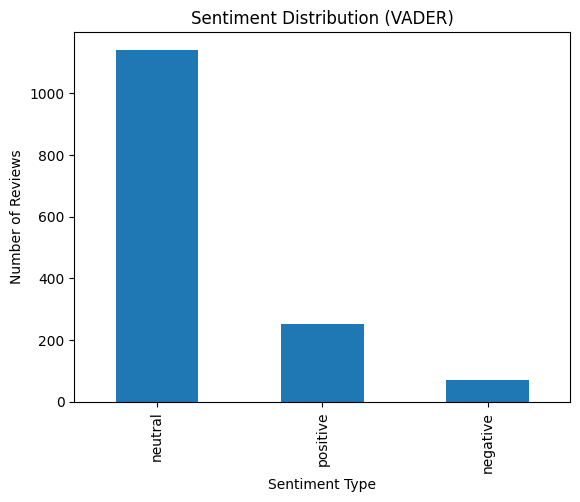

In [3]:

# Create a simple bar chart showing distribution

counts = df["label_vader"].value_counts()
counts.plot(kind="bar")

plt.title("Sentiment Distribution (VADER)")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment Type")
plt.show()


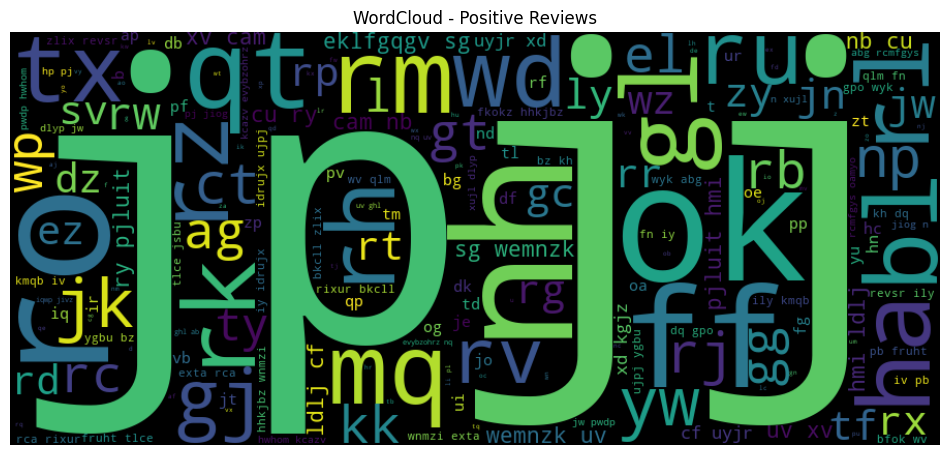

In [4]:

# Generate wordcloud for positive reviews only

# Join all positive reviews as one long string
positive_text = " ".join(
    df[df["label_vader"] == "positive"]["cleaned_text"].dropna().tolist()
)

wc = WordCloud(width=900, height=400).generate(positive_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()


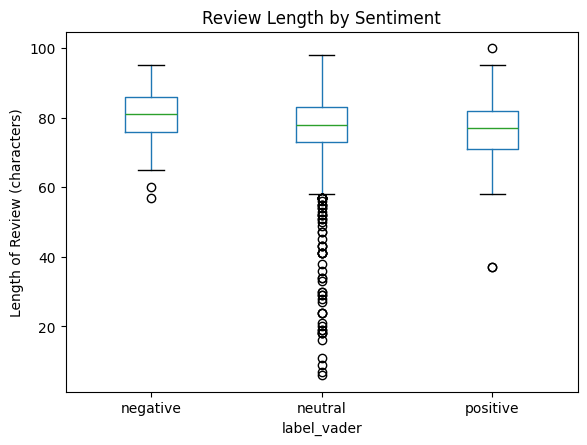

In [5]:

# Compare review lengths among sentiments

df["length"] = df["cleaned_text"].astype(str).apply(len)

df.boxplot(column="length", by="label_vader", grid=False)

plt.title("Review Length by Sentiment")
plt.suptitle("")  # Removes automatic title
plt.ylabel("Length of Review (characters)")
plt.show()